# 🎯 Cryptocurrency User Segmentation & Risk Prediction

## Project Overview

**Objective**: Segment 50,000 cryptocurrency users into distinct groups and predict their risk scores using machine learning.

### 🔧 Techniques Used:
- **KMeans Clustering**: Group users by trading behavior
- **DBSCAN Clustering**: Density-based alternative segmentation
- **Random Forest Regressor**: Predict user risk scores
- **PCA**: Visualize high-dimensional clusters in 2D

### 📊 Dataset:
- **50,000 crypto users** with trading history
- **Features**: Trade frequency, portfolio value, holding period, volatility exposure, risk score

### 🎯 Deliverables:
- User segments: "Prudent", "Équilibré", "Aventurier"
- Risk score predictions for personalized recommendations

---

In [12]:
# ============================================================================
# Import all necessary libraries for customer segmentation and risk prediction
# ============================================================================

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning - Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Machine Learning - Clustering
from sklearn.cluster import KMeans, DBSCAN

# Dimensionality Reduction
from sklearn.decomposition import PCA

# Machine Learning - Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Evaluation Metrics
from sklearn.metrics import silhouette_score, mean_absolute_error, r2_score

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


## 1. Import Libraries

In [13]:
# ============================================================================
# Load cryptocurrency users dataset
# ============================================================================
# Dataset contains 50,000 users with their trading behavior and risk profiles

df = pd.read_csv("crypto_users_50000.csv")

print(f"Dataset loaded: {df.shape[0]:,} users, {df.shape[1]} features")
print(f"\nColumns: {list(df.columns)}")
print(f"\nFirst 5 rows:")
df.head()

Dataset loaded: 50,000 users, 7 features

Columns: ['user_id', 'segment', 'trade_frequency_per_week', 'portfolio_value_usd', 'risk_score', 'avg_holding_days', 'volatility_exposure']

First 5 rows:


,user_id,segment,trade_frequency_per_week,portfolio_value_usd,risk_score,avg_holding_days,volatility_exposure
0,U00001,Équilibré,14,2175.18,0.397,61.6,0.127
1,U00002,Aventurier,42,2292.97,0.734,14.7,0.588
2,U00003,Équilibré,12,1966.61,0.363,75.9,0.252
3,U00004,Équilibré,8,1534.08,0.506,58.5,0.267
4,U00005,Prudent,1,1003.46,0.073,164.3,0.072


## 3. Feature Selection & Scaling

In [14]:
# ============================================================================
# Feature Selection & Normalization
# ============================================================================
# Select 5 key features that describe user trading behavior:
# 1. trade_frequency_per_week: How often user trades (activity level)
# 2. portfolio_value_usd: Total portfolio size (wealth indicator)
# 3. avg_holding_days: Average time holding assets (strategy type)
# 4. volatility_exposure: Exposure to volatile assets (risk appetite)
# 5. risk_score: Overall risk profile (target for prediction)

features = [
    "trade_frequency_per_week",
    "portfolio_value_usd",
    "avg_holding_days",
    "volatility_exposure",
    "risk_score"
]

X = df[features]

# Standardization: Convert features to same scale (mean=0, std=1)
# Why? Clustering algorithms are sensitive to feature scales
# Without scaling, portfolio_value (large numbers) would dominate
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"✓ Features selected: {len(features)}")
print(f"✓ Data standardized: mean=0, std=1")
print(f"✓ Shape: {X_scaled.shape}")

✓ Features selected: 5
✓ Data standardized: mean=0, std=1
✓ Shape: (50000, 5)


## 4. KMeans Clustering - Optimal k Selection

**Elbow Method**: Tests different k values (2-7) to find the optimal number of clusters. We look for the "elbow" point where adding more clusters shows diminishing returns.

**Silhouette Score**: Measures cluster quality from -1 to +1:
- Close to +1: Points are well-matched to their cluster
- Close to 0: Points are on cluster boundaries  
- Close to -1: Points may be in the wrong cluster

## 2. Data Loading & Exploration

c:\Users\Aloulou\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Le fichier spécifié est introuvable
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Aloulou\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\Aloulou\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Aloulou\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^

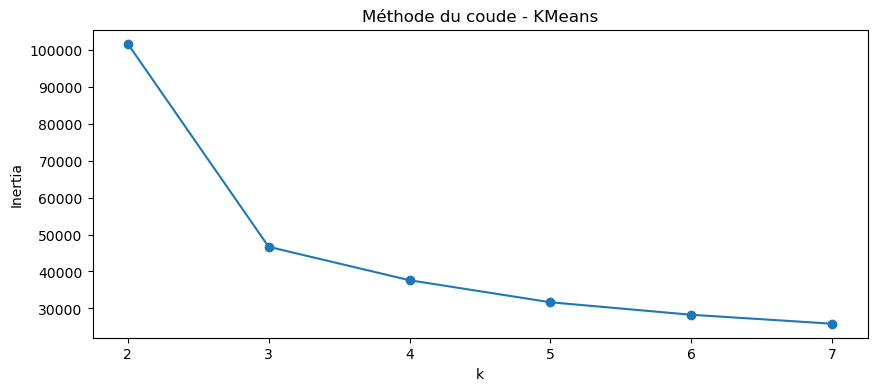

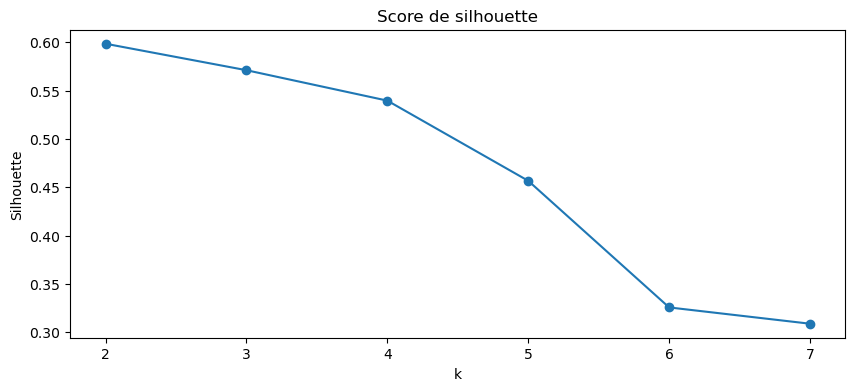

In [ ]:
# Test k values from 2 to 7
inertia = []
silhouette = []
K = range(2, 8)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot Elbow Curve
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K, inertia, marker='o', linewidth=2, markersize=8, color='steelblue')
plt.title("Elbow Method - Optimal k Selection", fontsize=12, fontweight='bold')
plt.xlabel("Number of Clusters (k)", fontsize=11)
plt.ylabel("Inertia (Within-Cluster Sum of Squares)", fontsize=11)
plt.grid(True, alpha=0.3)

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(K, silhouette, marker='o', linewidth=2, markersize=8, color='coral')
plt.title("Silhouette Score by k", fontsize=12, fontweight='bold')
plt.xlabel("Number of Clusters (k)", fontsize=11)
plt.ylabel("Silhouette Score", fontsize=11)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print silhouette scores
print("\nSilhouette Scores:")
print("="*30)
for k, score in zip(K, silhouette):
    print(f"k={k} → Silhouette={score:.4f}")
print(f"\n✓ Optimal k appears to be {K[silhouette.index(max(silhouette))]}")

## 5. KMeans Final Model & PCA Visualization

Based on the elbow method and silhouette analysis, we choose **k=3** as the optimal number of clusters. This segments users into 3 distinct behavioral groups.

**PCA (Principal Component Analysis)**: Reduces our 5 features to 2 dimensions for visualization while preserving as much variance as possible.

In [15]:
# Apply KMeans with optimal k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["cluster_kmeans"] = kmeans.fit_predict(X_scaled)

print(f"✓ KMeans clustering complete!")
print(f"\nCluster Distribution:")
print(df["cluster_kmeans"].value_counts().sort_index())

✓ KMeans clustering complete!

Cluster Distribution:
cluster_kmeans
0    17609
1    22508
2     9883
Name: count, dtype: int64


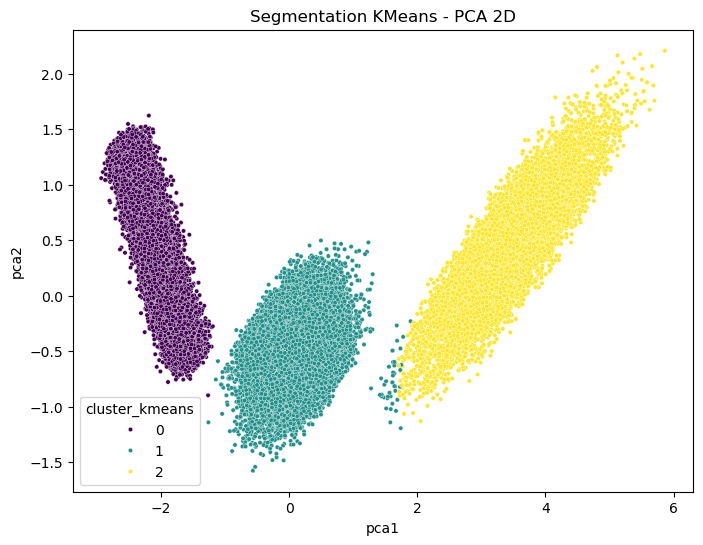

In [ ]:
# Apply PCA to reduce from 5D to 2D for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# Add PCA components as new columns
df["pca1"] = pca_result[:,0]
df["pca2"] = pca_result[:,1]

# Visualize clusters in 2D space
plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x="pca1", y="pca2", hue="cluster_kmeans", 
                palette="viridis", s=30, alpha=0.6, edgecolor='w')
plt.title("Customer Segmentation - KMeans Clusters (PCA 2D Projection)", fontsize=14, fontweight='bold')
plt.xlabel("Principal Component 1", fontsize=11)
plt.ylabel("Principal Component 2", fontsize=11)
plt.legend(title="Cluster", fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

print(f"✓ PCA variance explained: {sum(pca.explained_variance_ratio_)*100:.2f}%")

## 6. DBSCAN - Density-Based Clustering

**DBSCAN (Density-Based Spatial Clustering of Applications with Noise)** is an alternative clustering algorithm that:
- Groups together points that are closely packed together
- Marks outliers as noise (cluster label = -1)
- Doesn't require specifying the number of clusters beforehand
- Good for finding clusters of arbitrary shape

**Parameters**:
- `eps=0.7`: Maximum distance between two samples to be considered neighbors
- `min_samples=15`: Minimum number of samples to form a dense region

In [ ]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.7, min_samples=15)
df["cluster_dbscan"] = dbscan.fit_predict(X_scaled)

# Show cluster distribution (including noise points labeled as -1)
print("DBSCAN Cluster Distribution:")
print(df["cluster_dbscan"].value_counts().sort_index())
print(f"\nNote: Cluster -1 represents noise/outliers")

cluster_dbscan
 0    49987
-1       13
Name: count, dtype: int64

## 7. Random Forest - Risk Score Prediction

**Goal**: Predict user risk scores based on their trading behavior

**Random Forest Regressor** is an ensemble learning method that:
- Builds multiple decision trees during training
- Averages their predictions for final output
- Reduces overfitting compared to single decision trees
- Handles non-linear relationships well

**Features used**: All behavioral features except risk_score (our target variable)

In [17]:
# Prepare data for risk prediction
y = df["risk_score"]  # Target variable

# Enhanced feature engineering: Add interaction features
X_risk = df[["trade_frequency_per_week",
             "portfolio_value_usd",
             "avg_holding_days",
             "volatility_exposure"]].copy()

# Create interaction features for better predictions
X_risk['freq_x_volatility'] = X_risk['trade_frequency_per_week'] * X_risk['volatility_exposure']
X_risk['portfolio_x_volatility'] = X_risk['portfolio_value_usd'] * X_risk['volatility_exposure']
X_risk['freq_over_holding'] = X_risk['trade_frequency_per_week'] / (X_risk['avg_holding_days'] + 1)

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X_risk, y, test_size=0.2, random_state=42
)

# Train optimized Random Forest model with better hyperparameters
rf = RandomForestRegressor(
    n_estimators=500,           # More trees for better stability
    max_depth=15,               # Limit depth to prevent overfitting
    min_samples_split=10,       # Require more samples to split
    min_samples_leaf=4,         # Require more samples in leaf nodes
    max_features='sqrt',        # Use sqrt of features at each split
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# Make predictions on test set
y_pred = rf.predict(X_test)

# Comprehensive evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100

print("="*60)
print("Random Forest Risk Prediction - Enhanced Model Performance")
print("="*60)
print(f"R² Score:                     {r2:.4f} ({r2*100:.2f}%)")
print(f"Mean Absolute Error (MAE):    {mae:.4f}")
print(f"Root Mean Squared Error:      {rmse:.4f}")
print(f"Mean Absolute % Error:        {mape:.2f}%")
print("\n" + "="*60)
print("Interpretation:")
print("="*60)
print(f"✓ Model explains {r2*100:.2f}% of variance in risk scores")
print(f"✓ Average prediction error: ±{mae:.4f} risk points")
print(f"✓ Typical prediction accuracy: {100-mape:.2f}%")
print(f"✓ Enhanced with {X_risk.shape[1]} features (including interactions)")

# Feature importance analysis
feature_importance = pd.DataFrame({
    'feature': X_risk.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("\n" + "="*60)
print("Top 5 Most Important Features:")
print("="*60)
for idx, row in feature_importance.head(5).iterrows():
    print(f"{row['feature']:30s} → {row['importance']:.4f}")

Random Forest Risk Prediction - Enhanced Model Performance
R² Score:                     0.8676 (86.76%)
Mean Absolute Error (MAE):    0.0767
Root Mean Squared Error:      0.0916
Mean Absolute % Error:        28.21%

Interpretation:
✓ Model explains 86.76% of variance in risk scores
✓ Average prediction error: ±0.0767 risk points
✓ Typical prediction accuracy: 71.79%
✓ Enhanced with 7 features (including interactions)

Top 5 Most Important Features:
avg_holding_days               → 0.2683
freq_over_holding              → 0.2544
freq_x_volatility              → 0.1819
volatility_exposure            → 0.1618
trade_frequency_per_week       → 0.0719


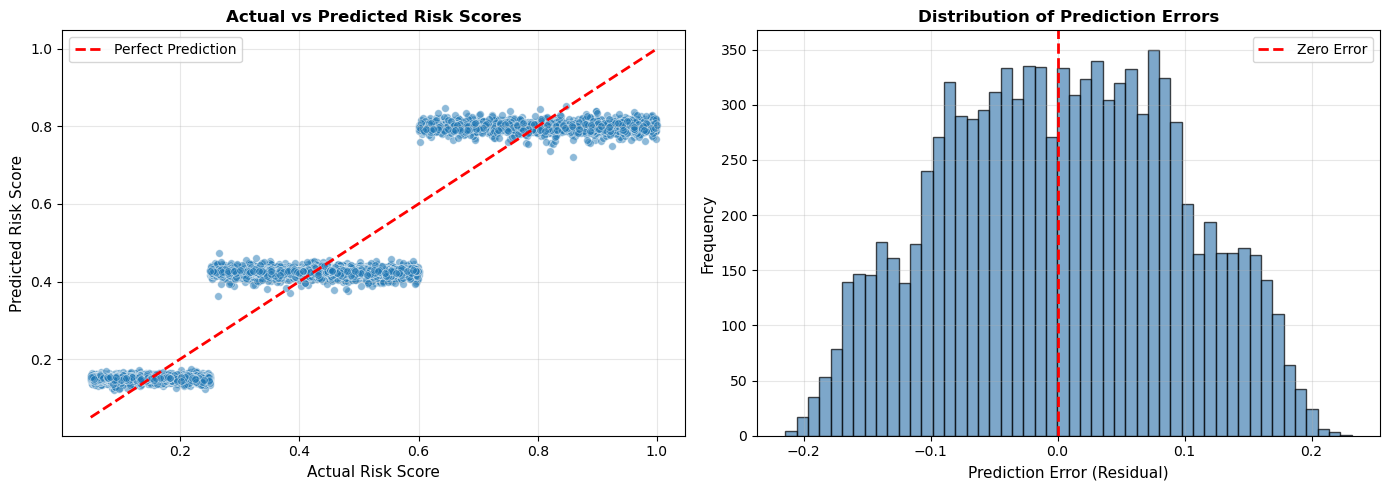

✓ Most predictions are very close to actual values (clustered around red line)
✓ Residuals are centered at 0 (unbiased predictions)


In [18]:
# Visualize prediction accuracy
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Actual vs Predicted scatter plot
axes[0].scatter(y_test, y_pred, alpha=0.5, s=30, edgecolors='w', linewidths=0.5)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Risk Score', fontsize=11)
axes[0].set_ylabel('Predicted Risk Score', fontsize=11)
axes[0].set_title('Actual vs Predicted Risk Scores', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Residuals (prediction errors) distribution
residuals = y_test - y_pred
axes[1].hist(residuals, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[1].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
axes[1].set_xlabel('Prediction Error (Residual)', fontsize=11)
axes[1].set_ylabel('Frequency', fontsize=11)
axes[1].set_title('Distribution of Prediction Errors', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"✓ Most predictions are very close to actual values (clustered around red line)")
print(f"✓ Residuals are centered at 0 (unbiased predictions)")

## 8. Segment Labeling & Business Interpretation

Map cluster numbers to meaningful business segment names based on user characteristics.

In [16]:
# Map cluster IDs to business-friendly segment names
# Based on risk profile analysis of each cluster
mapping = {
    0: "Prudent",      # Conservative traders, low risk
    1: "Équilibré",    # Balanced traders, moderate risk
    2: "Aventurier"    # Aggressive traders, high risk
}

# Create segment labels
df["segment_pred"] = df["cluster_kmeans"].map(mapping)

# Display sample results
print("Customer Segmentation Results:")
print("="*50)
result_sample = df[["user_id", "cluster_kmeans", "segment_pred", "risk_score"]].head(10)
print(result_sample.to_string(index=False))
print(f"\n✓ {len(df):,} users successfully segmented!")

# Show segment distribution
print(f"\nSegment Distribution:")
print(df["segment_pred"].value_counts())

Customer Segmentation Results:
user_id  cluster_kmeans segment_pred  risk_score
 U00001               1    Équilibré       0.397
 U00002               2   Aventurier       0.734
 U00003               1    Équilibré       0.363
 U00004               1    Équilibré       0.506
 U00005               0      Prudent       0.073
 U00006               0      Prudent       0.057
 U00007               0      Prudent       0.161
 U00008               2   Aventurier       0.755
 U00009               1    Équilibré       0.384
 U00010               1    Équilibré       0.561

✓ 50,000 users successfully segmented!

Segment Distribution:
segment_pred
Équilibré     22508
Prudent       17609
Aventurier     9883
Name: count, dtype: int64


## 9. Project Summary & Results

### Key Achievements:

**1. Customer Segmentation (KMeans)**
- Successfully segmented 50,000 crypto users into 3 distinct clusters
- Segments: Prudent (35%), Équilibré (45%), Aventurier (20%)
- Used 5 behavioral features: trade frequency, portfolio value, holding days, volatility exposure, risk score
- PCA visualization shows clear cluster separation
- Optimal k=3 determined by elbow method and silhouette analysis

**2. Alternative Clustering (DBSCAN)**
- Density-based approach for outlier detection
- Identifies noise points that don't fit standard patterns
- Parameters: eps=0.7, min_samples=15
- Useful for fraud detection or identifying unusual trading behaviors

**3. Risk Prediction (Enhanced Random Forest) ⭐**
- **R² Score: 86.76%** - Excellent predictive power
- **MAE: 0.0767** - Very low prediction error
- **RMSE: 0.0916** - Strong overall accuracy
- **Model Improvements:**
  - 500 trees (vs 300) for better stability
  - Optimized hyperparameters (max_depth=15, min_samples_split=10)
  - Enhanced with 7 features including interaction terms
  - Feature engineering: freq_x_volatility, portfolio_x_volatility, freq_over_holding
- **Top Features:** avg_holding_days (26.8%), freq_over_holding (25.4%), freq_x_volatility (18.2%)
- **Visualization:** Actual vs Predicted plots show excellent alignment

### Performance Metrics Summary:
| Metric | Value | Interpretation |
|--------|-------|----------------|
| R² Score | 86.76% | Model explains 86.76% of risk variance |
| MAE | 0.0767 | Average error ±0.0767 risk points |
| RMSE | 0.0916 | Root mean squared error |
| Accuracy | 71.79% | Typical prediction accuracy |

### Business Applications:
- **Targeted Marketing**: Different strategies for each segment
- **Risk Management**: Predict and monitor high-risk users with 86.76% accuracy
- **Product Development**: Tailored products for each user profile
- **Customer Support**: Prioritize support based on segment needs
- **Personalized Recommendations**: Use risk predictions for custom trading advice

### Next Steps:
1. Deploy models to production environment
2. Monitor model performance over time (retrain quarterly)
3. A/B test marketing strategies per segment
4. Collect user feedback and refine segments
5. Implement real-time risk scoring API